In [1]:
import  pandas  as pd 
import  numpy  as np 
from defname import *

In [2]:
data = pd.read_excel('门店日详情.xlsx',encoding='gbk')

In [3]:
data.columns

Index(['日期', '总管ID', '总管名', '供应商ID', '供应商名', '城市', '城市名', '商户ID', '商户名',
       '总曝光人数', '总点击人数', '总下单人数', '总成交人数', '点击转化率（%）', '下单转化率（%）', '成交转化率（%）'],
      dtype='object')

In [4]:
add = [ '总曝光人数', '总点击人数', '总下单人数', '总成交人数']           
mean = []
count = ['日期', '总管ID', '总管名', '供应商ID', '供应商名', '城市', '城市名', '商户ID', '商户名']

In [5]:
colmuns = [count,add,mean]

In [6]:
data_sum=groupdata(data,colmuns,'商户ID')

#### 线性回归预测曝光入店  入店下单人数关系

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [8]:
data_sum['日期'].count()

1112

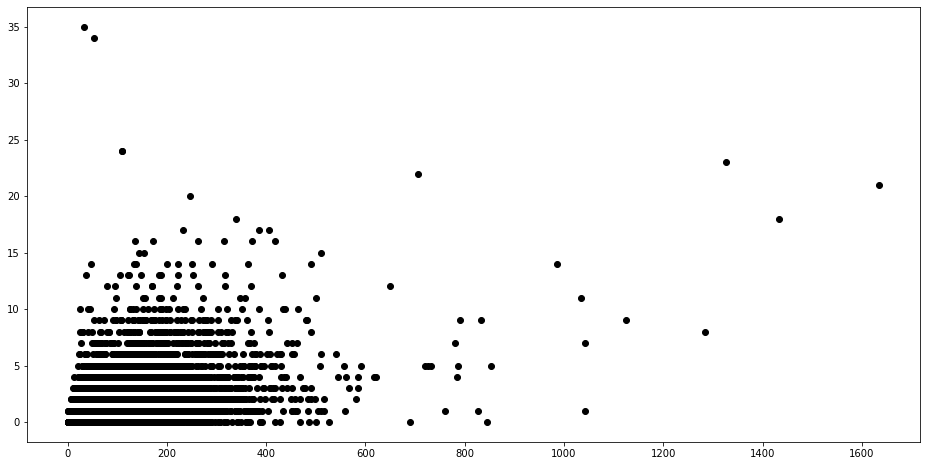

In [9]:
plt.figure(figsize=(16,8))
plt.scatter(data['总曝光人数'],data['总点击人数'],c = '#000000')
# plt.scatter(data_linear_big['总曝光人数'],data_linear_big['总点击人数'],c = 'blue')
plt.show()

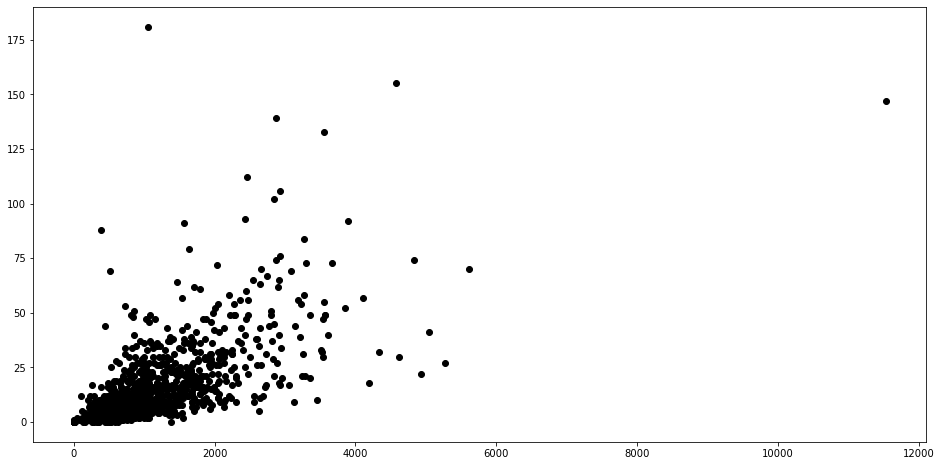

In [10]:
plt.figure(figsize=(16,8))
plt.scatter(data_sum['总曝光人数'],data_sum['总点击人数'],c = '#000000')
# plt.scatter(data_linear_big['总曝光人数'],data_linear_big['总点击人数'],c = 'blue')
plt.show()

In [11]:
data_sum_linear = data_sum[['商户名','总曝光人数','总点击人数','总下单人数']]

In [12]:
# q3 = data_linear['曝光人数'].quantile(0.75)
# q4 = data_linear['曝光人数'].quantile(0.25)
# iq = 1.5*(q3 + q4)
# print(q3+iq)

In [13]:
data_sum_linear

,商户名,总曝光人数,总点击人数,总下单人数
0,邂逅花坊（普善路店）,561,13,0
1,邂逅花坊（漪花园柳园路店）,978,26,2
2,邂逅花坊（惠南镇英雄村店）,1373,23,1
3,邂逅花坊（石化卫清西路店）,2868,139,9
4,邂逅花坊（芳草卉长岛路店）,1487,34,3
...,...,...,...,...
1107,邂逅花坊（百合鲜花振兴街店）,1,0,0
1108,邂逅花坊（情缘鲜花婚庆永吉大街店）,4,0,0
1109,邂逅花坊(联投中心店),1,0,0
1110,邂逅花坊（花赞鲜花店）,1,0,0


In [14]:
X = data_sum_linear['总曝光人数'].values.reshape(-1,1)
y = data_sum_linear['总点击人数'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,y)
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
print('a = {:.5}'.format(reg.coef_[0][0]))
print('b = {:.5}'.format(reg.intercept_[0]))
print("线性模型为: Y = {:.5}X + {:.5} ".format(reg.coef_[0][0], reg.intercept_[0]))

a = 0.013645
b = 0.25575
线性模型为: Y = 0.013645X + 0.25575 


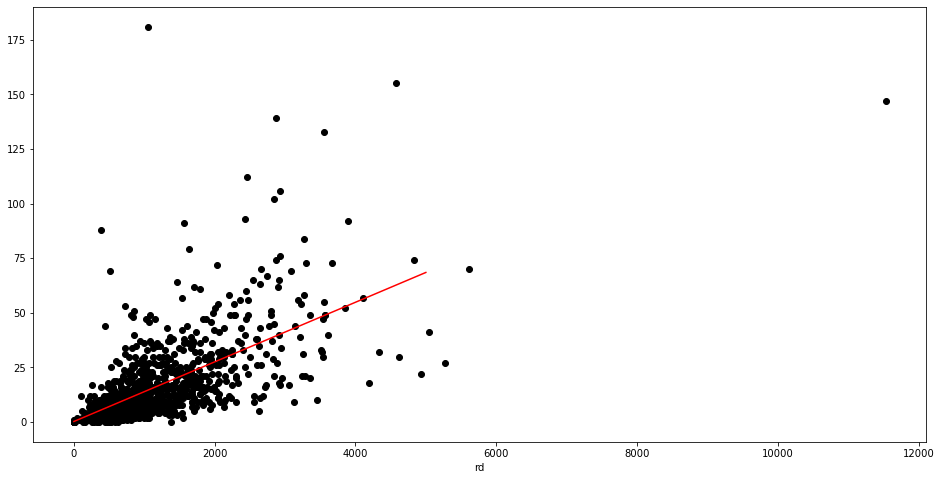

In [15]:
plt.figure(figsize=(16,8))
plt.scatter(data_sum_linear['总曝光人数'],data_sum_linear['总点击人数'],c = '#000000')
# plt.scatter(data_linear['入店人数'],data_linear['下单人数'],c = 'blue')
x = np.linspace(0,5000, 100)
y = 0.013645  * x + 0.25575 
plt.plot(x,y,c = 'red')
plt.xlabel('bg')
plt.xlabel('rd')
plt.show()

In [19]:
data_sum_linear['进店率'] = data_sum_linear['总曝光人数'] / data_sum_linear['总点击人数']


<ipython-input-19-a4373a49dc0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sum_linear['进店率'] = data_sum_linear['总曝光人数'] / data_sum_linear['总点击人数']


In [22]:
data_sum_linear.fillna(0)

,商户名,总曝光人数,总点击人数,总下单人数,进店率
0,邂逅花坊（普善路店）,561,13,0,43.153846
1,邂逅花坊（漪花园柳园路店）,978,26,2,37.615385
2,邂逅花坊（惠南镇英雄村店）,1373,23,1,59.695652
3,邂逅花坊（石化卫清西路店）,2868,139,9,20.633094
4,邂逅花坊（芳草卉长岛路店）,1487,34,3,43.735294
...,...,...,...,...,...
1107,邂逅花坊（百合鲜花振兴街店）,1,0,0,inf
1108,邂逅花坊（情缘鲜花婚庆永吉大街店）,4,0,0,inf
1109,邂逅花坊(联投中心店),1,0,0,inf
1110,邂逅花坊（花赞鲜花店）,1,0,0,inf
